# Reconocimiento de patrones: Clasificación
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
![ ](images/blank.png)
![agents](images/binary_data_under_a_magnifying.jpg)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/pattern-recognition/blob/master/Clasificación%20V.ipynb)

## Técnicas de clasificación: Reconocimiento sintáctico


### Reconocimiento estructural de patrones

El **reconocimiento de patrones estructural** hace énfasis en la integración de patrones simples para conformar patrones complejos. En este enfoque, un patrón es descrito mediante una estructura jerárquica de componentes, como en el caso de la estructura sintáctica de los lenguajes formales:

![](images/structural.jpg)<br>

Existen dos formas principales de reconocimiento estructural de patrones: la **estructura de pareo** (*matching structure*) y el **análisis sintáctico**. El método de apareamiento consiste básicamente en *aparear* los elementos a clasificar con *moldes* conocidos. En muchos casos, este método puede expresarse de manera sintáctica. 

![](images/matching.jpg)

El enfoque sintáctico, por su parte, realiza el reconocimiento de patrones a partir de una determinada *sintaxis*, lo que permite utilizar las herramientas de la teoría formal de lenguajes. 

### Gramáticas formales

Una gramática (formal) se define como la tupla

$$G = (N,\Sigma,P,S)$$

donde

* $N$ es un conjunto finito de símbolos  no-terminales (variables a substituir)
* $\Sigma$ es un conjunto finito de símbolos terminales llamado el *alfabeto* o *vocabulario*
* $S\in N$ es el *símbolo inicial*, es decir el símbolo no terminal desde donde se inicia la construcción de una *'frase'*
* $P$ es un conjunto finito de *reglas de producción*, es decir, reglas que definen cómo pueden irse reemplazando los símbolos no-terminales, desde el símbolo inicial, hasta tener una frase terminada.

La forma de las reglas de producción determinan el tipo de gramática y el correspondiente autómata. 

Cada gramática está asociado a un tipo de *autómata* que sería, en realidad, el responsable de reconocer los patrones generables por la gramática correspondiente.

Un lenguaje, es un conjunto de secuencias o cadenas sobre $\Sigma$: $L(G) \subseteq \Sigma^*$. Cuando se aplica la teoría de gramáticas formales al lenguaje natural, el vocabulario es usualmente un conjunto de letras, signos, palabras, morfemas o sonidos.

Los tipos principales de autómata están definidos mediante la jerarquía de Chomsky:

Gramática | Lenguaje | Autómata
-| 
Tipo 0 | Recursivamente enumerable |	Máquina de Turing
Tipo 1 | Dependiente del contexto | Autómata linealmente acotado
Tipo 2 | Independiente del contexto | Autómata de pila
Tipo 3 | Regular | Autómata finito

#### Gramáticas no lingüísticas

Aunque la formulación de gramáticas proviene del contexto lingüístico, es posible desarrollar gramáticas para representar patrones en otros contextos. Consideremos por ejemplo la siguiente gramática regular:

![](images/syntactic_1.png)<br>

En esta gramática, los elementos del alfabeto son segmentos de rectángulos. A partir de las reglas en $P$ podemos construir rectángulos como los siguientes:<br>

![](images/syntactic_2.png)

Dada esta gramática podemos construir un autómata finito capaz de reconocer rectángulos en una imagen. 

Un problema que ha llamado intensamente la atención de la industria es el reconocimiento automático de placas vehiculares. Este es un problema relativamente simple de resolver en ambientes controlados, sin embargo, es un problema complicado cauando deben reconocerse placas de diferentes tipos en un contexto abierto, posiblemente con visibiidad limitada:

![](images/plates.jpg)

Un paso importante en la resolución de este problema es identificar la *estructura* en los componentes de una placa: Una placa de auto es un rectángulo (el símbolo inicial $S$):

![](images/plates_1.jpg)

Pero no cualquier rectángulo "*genera*" una placa:

![](images/plates_2.jpg)



Una etapa posterior incluiría evaluar las posibles producciones a partir del rectángulo, capaces de conducir a la generación de una placa válida:

![](images/plates_3.jpg)

### Procesamiento de lenguaje natural

#### Gramáticas libres de contexto

La ubicación de los lenguajes naturales en la jerarquía de Chomsky (o qué tanto pueden ser representados en ella) es un tema de discusión abierto. El uso de los diferentes tipos de gramáticas para análisis de lenguajes naturales ha sido limitado, siendo las gramáticas más utilizadas las gramáticas libres de contexto.

Considérese la siguiente gramática:

In [1]:
import nltk
from nltk.parse.generate import generate
from nltk import CFG
from IPython.display import Image, display  


grammar = nltk.CFG.fromstring("""
    S -> NP VP
    NP -> Det N | NP PP | N
    VP -> V NP | VP PP | V
    PP -> P NP | P
    Det -> 'el' | 'los' | 'la'
    N -> 'hombre' | 'parque' | 'perro' | 'amigos' | 'cafe' | 'leche'
    V -> 'duerme' | 'mira' | 'toma' | 'camina' | 'toman'
    P -> 'en' | 'con' |'solo'
    """)

parser = nltk.ChartParser(grammar)
print(grammar)

Grammar with 26 productions (start state = S)
    S -> NP VP
    NP -> Det N
    NP -> NP PP
    NP -> N
    VP -> V NP
    VP -> VP PP
    VP -> V
    PP -> P NP
    PP -> P
    Det -> 'el'
    Det -> 'los'
    Det -> 'la'
    N -> 'hombre'
    N -> 'parque'
    N -> 'perro'
    N -> 'amigos'
    N -> 'cafe'
    N -> 'leche'
    V -> 'duerme'
    V -> 'mira'
    V -> 'toma'
    V -> 'camina'
    V -> 'toman'
    P -> 'en'
    P -> 'con'
    P -> 'solo'


Esta gramática permite generar frases como $\textrm{"el perro duerme"}$, cuyo árbol de generación por $G$
es:

Árbol de generación de la cadena "el perro duerme"


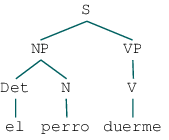

In [2]:
X = "el perro duerme"
print("Árbol de generación de la cadena \"{}\"".format(X))
for tree in parser.parse(X.split()):
    display(tree) # tree.draw() arroja una ventana emergente

o $\textrm{"los amigos toman cafe"}$

Generación de la cadena "los amigos toman cafe"


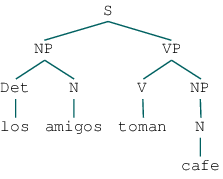

In [3]:
X = "los amigos toman cafe"
print("Generación de la cadena \"{}\"".format(X))
for tree in parser.parse(X.split()):
    display(tree)    

o $\textrm{"el perro duerme en el parque"}$

Generación de la cadena "el perro duerme en el parque"


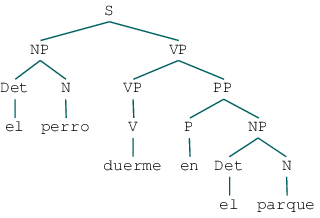

In [4]:
X = "el perro duerme en el parque"
print("Generación de la cadena \"{}\"".format(X))
for tree in parser.parse(X.split()):
    display(tree)    

Y muchas otras frases:

In [5]:
sent_to_print = 30
frases = generate(grammar)

for sentence in generate(grammar, n=sent_to_print):
    print(' '.join(sentence))

el hombre duerme el hombre
el hombre duerme el parque
el hombre duerme el perro
el hombre duerme el amigos
el hombre duerme el cafe
el hombre duerme el leche
el hombre duerme los hombre
el hombre duerme los parque
el hombre duerme los perro
el hombre duerme los amigos
el hombre duerme los cafe
el hombre duerme los leche
el hombre duerme la hombre
el hombre duerme la parque
el hombre duerme la perro
el hombre duerme la amigos
el hombre duerme la cafe
el hombre duerme la leche
el hombre duerme el hombre en el hombre
el hombre duerme el hombre en el parque
el hombre duerme el hombre en el perro
el hombre duerme el hombre en el amigos
el hombre duerme el hombre en el cafe
el hombre duerme el hombre en el leche
el hombre duerme el hombre en los hombre
el hombre duerme el hombre en los parque
el hombre duerme el hombre en los perro
el hombre duerme el hombre en los amigos
el hombre duerme el hombre en los cafe
el hombre duerme el hombre en los leche


Muchas de esta frases, aunque son sintácticamente correctas, no tienen un significado "correcto". 

Las gramáticas libres de contexto (y los correspondientes autómatas finitos / de pila) ofrecen un mecanismo poderoso para la generación (y reconocimiento) de patrones, particularmente útiles en el reconocimiento de patrones en lenguajes, por ejemplo para la implementación de compiladores (específicamente en la etapa de *parsing* o análisis sintáctico).

#### Gramáticas sensibles al contexto

Las gramáticas sensibles al contexto ofrecen una mayor capacidad de discriminación al establecer condiciones de contexto para la aplicación de reglas. Las reglas, en este caso, contienen cadenas en ambos lados, del tipo $\alpha\textrm{A}\beta \to \alpha \gamma \beta$ donde $\textrm{A} \in N$, $\alpha, \beta \in (N \cup \Sigma)^*$ y $\gamma \in (N \cup \Sigma)^+$. En la siguiente versión modificada de nuestra gramática, hemos reemplazado la regla $\textrm{NP} \to \textrm{N}$ por las reglas $\textrm{'la' NP} \to \textrm{NF}$ y $\textrm{'la' NP} \to \textrm{NF}$ y hemos distinguido entre nombres femenino ($\textrm{NF}$) y masculino ($\textrm{NM}$). 

    P = {
        S -> NP VP
        NP -> Det N
        NP -> NP PP
        'la' NP -> NF
        'el' NP -> NM
        VP -> V NP
        VP -> VP PP
        VP -> V
        PP -> P NP
        PP -> P
        Det -> 'el'
        Det -> 'los'
        Det -> 'la'S -> NP VP
        NM -> 'hombre'
        NM -> 'parque'
        NM -> 'perro'
        NM -> 'amigos'
        NM -> 'cafe'
        NF -> 'leche'
        V -> 'duerme'
        V -> 'mira'
        V -> 'toma'
        V -> 'camina'
        V -> 'toman'
        P -> 'en'
        P -> 'con'
        P -> 'solo'
    }
    
Estos cambios evitarían la generación de frases como "el hombre duerme <u>la hombre</u>", "el hombre duerme <u>la parque</u>", "el hombre duerme <u>la perro</u>", "el hombre duerme <u>la cafe</u>" y "el hombre duerme el hombre en <u>el leche</u>". Sin embargo, tratar de reflejar el contexto en frases generadas en un lenguaje natural mediante reglas rebasa la capacidad de las gramáticas convencionales. Considérese el siguiente ejemplo clásico en un diálogo de *Groucho Marx* (*Animal Crackers*, 1930):

> *One morning I shot an elephant in my pajamas. <br>
> How he got in my pajamas, I don't know.* ![](images/groucho.jpg)

Aunque la situación es utilizada como broma, particularmente al ser forzada por Groucho Marx, la estructura es sintácticamente correcta, lo cual es claro si modificamos ligeramente la cita, de la siguiente manera:

> I shot an elephant in my yard.

Una gramática (de juguete) capaz de generar estas frases sería:

In [6]:
groucho_grammar = nltk.CFG.fromstring("""
    S -> NP VP
    PP -> P NP 
    NP -> Det N | Det N PP | 'I'
    VP -> V NP | VP PP 
    Det -> 'an' | 'my'
    N -> 'elephant' | 'pajamas' | 'yard'
    V -> 'shot'
    P -> 'con' | 'in'
    """)

print(groucho_grammar)

Grammar with 15 productions (start state = S)
    S -> NP VP
    PP -> P NP
    NP -> Det N
    NP -> Det N PP
    NP -> 'I'
    VP -> V NP
    VP -> VP PP
    Det -> 'an'
    Det -> 'my'
    N -> 'elephant'
    N -> 'pajamas'
    N -> 'yard'
    V -> 'shot'
    P -> 'con'
    P -> 'in'


Esta gramática genera dos árboles en cada caso. Así para la frase "*I shot an elephant in my yard*", los árboles de generación serían:

![](images/groucho_elephant.png)

El árbol de la izquierda tiene al mismo nivel el verbo ('*shot*') y la preposición ('*in*'); describe la realización de la acción en un sitio "SHOT ... IN...": "*Le disparé a un elefante cuando yo estaba en mi patio*". El árbol de la derecha pone a la misma altura el objeto nominal ('*an elephant*') y a la frase preposicional ('*in my yard*'): "*Le disparé a un elefante que estaba en mi patio*". Ambas frases son sintácticamente y semánticamente correctas.

Los árboles de generación para la frase original, "*I shot an elephant in my pajamas*", son:

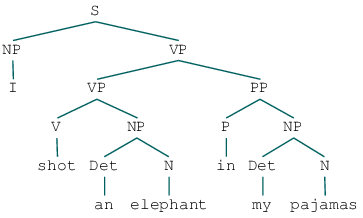

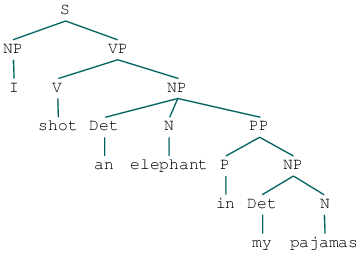

In [7]:
string = "I shot an elephant in my pajamas"

groucho_parser = nltk.ChartParser(groucho_grammar)
for tree in groucho_parser.parse(string.split()):
    display(tree)

En la gramática de prueba, la frase $\textrm{"el hombre con el perro camina en el parque con amigos"}$ también tiene asociados dos árboles de generación:

Generación de la cadena "el hombre con el perro camina en el parque con amigos"


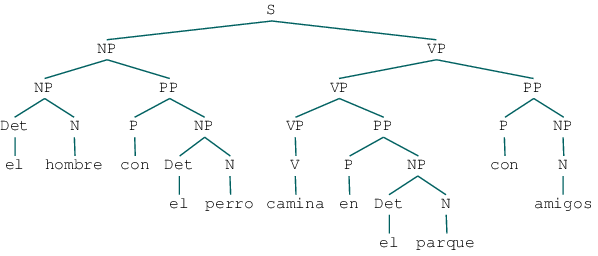

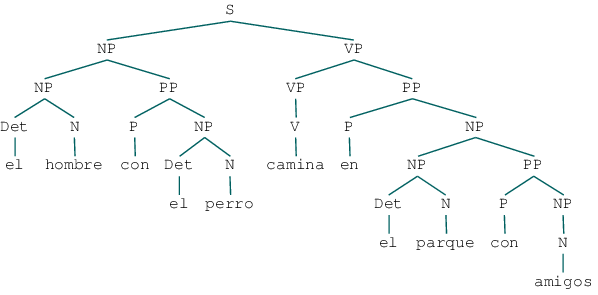

In [8]:
X = "el hombre con el perro camina en el parque con amigos"
print("Generación de la cadena \"{}\"".format(X))
for tree in parser.parse(X.split()):
    display(tree)    

### N-gramas y el enfoque probabilístico



<hr style="border-width: 3px;">

### Tarea 12

* Haga una revisión de ventajas e inconvenientes de las redes neuronales feed-forward.
* Utilice la técnica de redes neuronales en su proyecto.

**Fecha de entrega**: Martes 16 de noviembre.